# Importing Libraries

In [140]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import Image
import utm

# Data Loading & Handling

## Data Loading / Wrangling Pipeline

In [261]:
def data_pipeline(years=[2018,2019,2020,2021]):
    
    ### LOAD ORIGINAL DATA ###
    base_string = r"data\raw_data_Strassenverkehrsunfaelle\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_XXXX_Datensatz.csv"
    csv_file_path = [base_string.replace("XXXX", str(y)) for y in years]
    
    data_all = pd.DataFrame() # create empty dataframe to append yearly dataframes to 
    
    ### DATA WRANGLING ###
    for csv in csv_file_path:
        df = pd.read_csv(csv, sep=";", encoding = 'latin1')
        
        ### MAKE COLUMNS LOWERCASE ###
        df.columns = [col.lower() for col in df.columns]
        
        ### REPLACE DECIMAL COMMA TO DOT
        df["linrefx"] = list(map(lambda x: x.replace(",", "."), df["linrefx"]))
        df["linrefy"] = list(map(lambda x: x.replace(",", "."), df["linrefy"]))
        df["xgcswgs84"] = list(map(lambda x: x.replace(",", "."), df["xgcswgs84"]))
        df["ygcswgs84"] = list(map(lambda x: x.replace(",", "."), df["ygcswgs84"]))
        
        ### RENAME GCSWGS COLUMNS ###
        if "2018" in csv: # if data from 2018, then rename two columns additionally to match later data
            df.rename(columns={"istsonstig": "istsonstige", "strzustand": "ustrzustand"}, inplace=True)
        df.rename(columns={"xgcswgs84": "long", "ygcswgs84": "lat"}, inplace=True)
        
        data_all = pd.concat([data_all, df], axis=0)

    return data_all

data_all = data_pipeline()
data18 = data_pipeline(["2018"])
data19 = data_pipeline(["2019"])
data20 = data_pipeline(["2020"])
data21 = data_pipeline(["2021"])

## Save Dataframe to csv

In [263]:
data_all.to_csv(r"data\raw_data_Strassenverkehrsunfaelle\Data_2018-2021_combined.csv", index=False, sep=";")

## Load Original Data

## Make Columns Lowercase

## Replace decimal marker (comma -> dot)

## Rename `_gcswgs84` columns

# Explanations

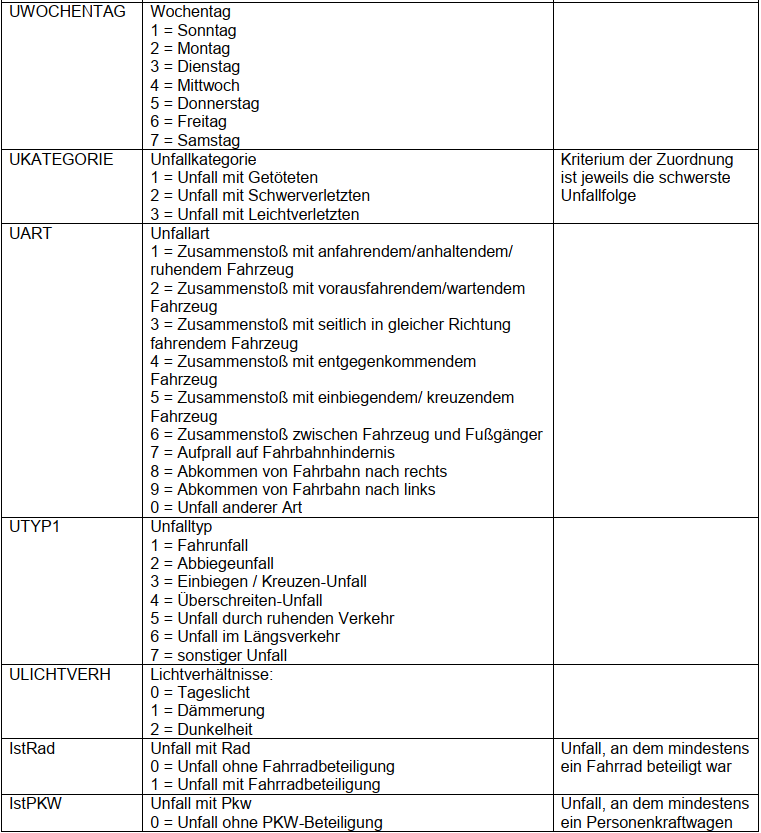

In [11]:
Image(filename=r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\DA_Final_Project\Berlin_Traffic_Accidents\raw_data_description\Desc_1.PNG") 

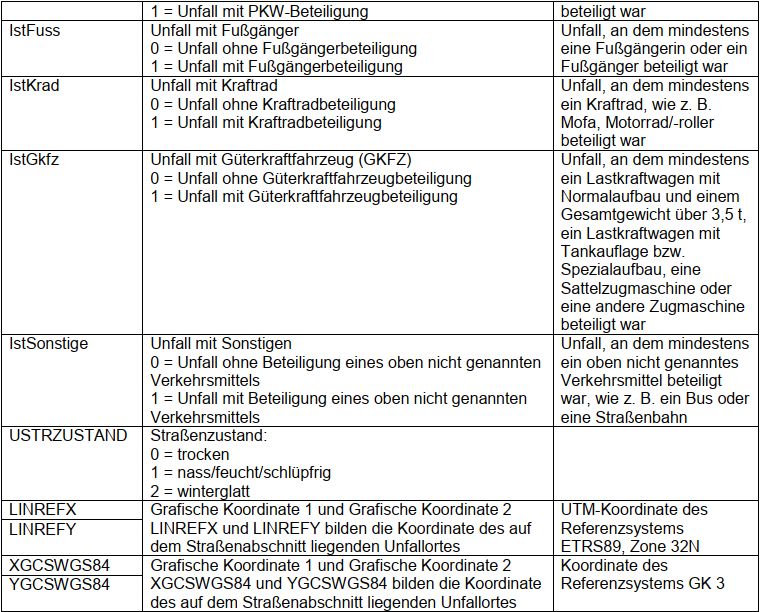

In [12]:
Image(filename=r"C:\Users\p.kollhof\Documents\IRONHACK_GitHub\DA_Final_Project\Berlin_Traffic_Accidents\raw_data_description\Desc_2.PNG") 

# Initial EDA

## Checking NaN distribution in features in `data_all`

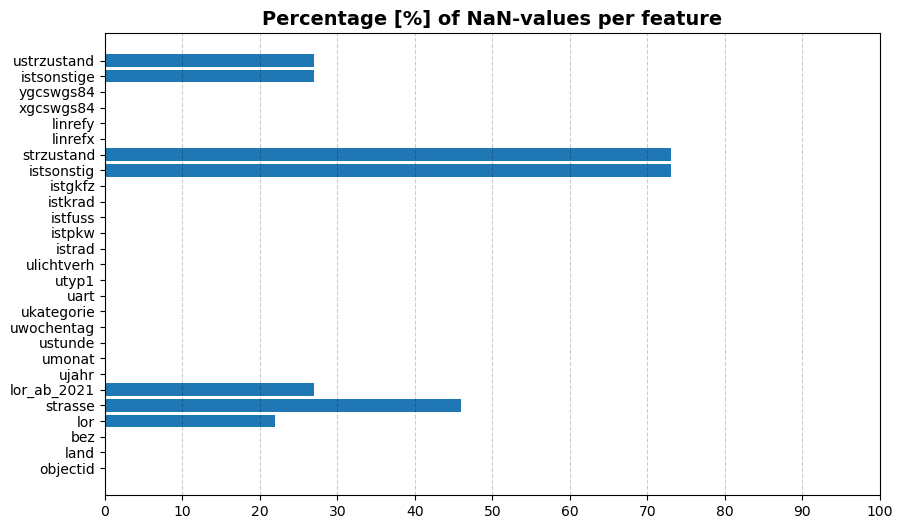

In [16]:
feature_nan_perc = [int(round((data_all[col].isna().sum() / len(data_all[col])*100),0)) 
                    for col in list(data_all.columns)]

fig, ax = plt.subplots(figsize=(10,6))
plt.title("Percentage [%] of NaN-values per feature", size=14, weight="bold")
plt.grid(ls="--", color="k", alpha=0.2, axis="x")
plt.barh(data_all.columns, feature_nan_perc)
plt.xticks(np.arange(0,101,10))

plt.show()

## Explore data21

### Check feature uniques

- accidents by:
    - type / kind / category
    - borough
    - month / day / time

In [17]:
data21

,objectid,land,bez,lor_ab_2021,ujahr,umonat,ustunde,uwochentag,ukategorie,uart,utyp1,ulichtverh,istrad,istpkw,istfuss,istkrad,istgkfz,istsonstige,ustrzustand,linrefx,linrefy,xgcswgs84,ygcswgs84
0,219249,11,3,3701658.0,2021,11,18,2,3,0,3,2,0,1,0,1,0,0,1,"800202,0742","5829640,204","13,42689483","52,53393955"
1,219248,11,7,7501134.0,2021,12,19,7,3,6,2,2,0,1,1,0,0,0,1,"798479,5317","5819049,219","13,39209027","52,43995086"
2,219247,11,4,4100101.0,2021,12,17,4,3,5,2,2,0,1,0,0,0,0,0,"793352,6128","5829680,195","13,32624193","52,53802784"
3,219246,11,4,4501041.0,2021,12,15,7,3,5,2,1,0,1,0,1,0,0,1,"792950,0395","5825362,081","13,31652064","52,49953417"
4,219243,11,11,11501339.0,2021,12,9,5,3,3,6,0,0,1,0,0,0,1,2,"807182,01","5825602,793","13,52575163","52,49386714"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262,112174,11,4,4300414.0,2021,3,16,4,3,6,2,0,0,1,1,0,0,0,1,"791505,4105","5826555,664","13,29634478","52,51100814"
11263,111541,11,4,4400726.0,2021,1,1,6,3,9,1,2,0,1,0,0,0,0,0,"791154,679","5824616,757","13,28949592","52,49381321"
11264,110370,11,3,2400520.0,2021,1,20,1,3,3,6,2,0,1,0,0,0,0,1,"799988,2122","5828912,431","13,42309463","52,52753402"
11265,109998,11,7,7300619.0,2021,1,14,7,3,2,6,0,0,1,0,0,0,0,1,"796018,2589","5822739,196","13,35925879","52,47436651"


In [135]:
#1 - "Mitte"
#2 - "Friedrichshain-Kreuzberg"
#3 - "Pankow"
#4 - "Charlottenburg-Wilmersdorf
#5 - "Spandau"
#6 - "Steglitz-Zehlendorf"
#7 - "Tempelhof-Schöneberg"
#8 - "Neukölln
#9 - "Treptow-Köpenick"
#10 - "Marzahn-Hellersdorf"
#11 - "Lichtenberg"
#12 - "Reinickendorf"

data21["bez"].value_counts().sort_index()

1     1761
2     1107
3     1011
4     1398
5      713
6      757
7     1059
8      799
9      776
10     538
11     619
12     729
Name: bez, dtype: int64

In [113]:
data21["umonat"].value_counts().sort_index()

1      481
2      436
3      765
4      720
5      991
6     1314
7     1053
8     1274
9     1300
10    1130
11    1007
12     796
Name: umonat, dtype: int64

In [115]:
#1 = Sonntag
#2 = Montag
#3 = Dienstag
#4 = Mittwoch
#5 = Donnerstag
#6 = Freitag
#7 = Samstag

data21["uwochentag"].value_counts().sort_index()

1     892
2    1786
3    1941
4    1868
5    1792
6    1781
7    1207
Name: uwochentag, dtype: int64

In [114]:
data21["ustunde"].value_counts().sort_index()

0      104
1       80
2       58
3       50
4       56
5      115
6      258
7      504
8      580
9      560
10     584
11     639
12     715
13     763
14     895
15    1031
16     951
17     915
18     788
19     572
20     379
21     276
22     229
23     165
Name: ustunde, dtype: int64

In [117]:
#1 = Unfall mit Getöteten // Accident with death
#2 = Unfall mit Schwerverletzten // Accident with severely injured 
#3 = Unfall mit Leichtverletzten // Accident with slightly injured

data21["ukategorie"].value_counts().sort_index()

1      31
2    1654
3    9582
Name: ukategorie, dtype: int64

In [122]:
#1 = Zusammenstoß mit anfahrendem/anhaltendem/ruhendem Fahrzeug // 
#2 = Zusammenstoß mit vorausfahrendem/wartendem Fahrzeug // 
#3 = Zusammenstoß mit seitlich in gleicher Richtung fahrendem Fahrzeug // 
#4 = Zusammenstoß mit entgegenkommendem Fahrzeug // 
#5 = Zusammenstoß mit einbiegendem/ kreuzendem Fahrzeug // 
#6 = Zusammenstoß zwischen Fahrzeug und Fußgänger // 
#7 = Aufprall auf Fahrbahnhindernis // 
#8 = Abkommen von Fahrbahn nach rechts // 
#9 = Abkommen von Fahrbahn nach links // 
#0 = Unfall anderer Art //

accidents_clusters = {
    "Crash with vehicle" : [1,2,3,4,5],
    "Vehicle-Person Crash" : 6,
    "Other crash" : 0,
    "Accident by Lane Departure" : [8,9],
    "Collision with Road-Object" : 7}

data21["uart"].value_counts().sort_index()

0    1537
1     943
2    2021
3     642
4     151
5    4355
6    1359
7      20
8     126
9     113
Name: uart, dtype: int64

In [123]:
#1 = Fahrunfall // 
#2 = Abbiegeunfall // 
#3 = Einbiegen / Kreuzen-Unfall // 
#4 = Überschreiten-Unfall // 
#5 = Unfall durch ruhenden Verkehr // 
#6 = Unfall im Längsverkehr // 
#7 = sonstiger Unfall // 

data21["utyp1"].value_counts().sort_index()

1     918
2    2764
3    2288
4     781
5     938
6    2449
7    1129
Name: utyp1, dtype: int64

In [125]:
#0 = Tageslicht // daylight
#1 = Dämmerung // twilight
#2 = Dunkelheit // darkness

data21["ulichtverh"].value_counts().sort_index()

0    8472
1     681
2    2114
Name: ulichtverh, dtype: int64

In [126]:
#0 = Unfall ohne Fahrradbeteiligung // Accident without bicycle 
#1 = Unfall mit Fahrradbeteiligung // Accident with bicycle

data21["istrad"].value_counts().sort_index()

0    7016
1    4251
Name: istrad, dtype: int64

In [130]:
#0 = Unfall ohne PKW-Beteiligung // Accident without car motorcycle
#1 = Unfall mit PKW-Beteiligung // Accident with car motorcycle

data21["istpkw"].value_counts().sort_index()

0    2229
1    9038
Name: istpkw, dtype: int64

In [129]:
#0 = Unfall ohne Kraftrad // Accident without  
#1 = Unfall mit Kraftrad // Accident with 

data21["istkrad"].value_counts().sort_index()

0    9611
1    1656
Name: istkrad, dtype: int64

In [128]:
#0 = Unfall ohne Fußgänger // Accident without pedestrian 
#1 = Unfall mit Fußgänger // Accident with pedestrian

data21["istfuss"].value_counts().sort_index()

0    9807
1    1460
Name: istfuss, dtype: int64

In [131]:
#0 = Unfall ohne LKW // Accident without truck 
#1 = Unfall mit LKW // Accident with truck

data21["istgkfz"].value_counts().sort_index()

0    10925
1      342
Name: istgkfz, dtype: int64

In [133]:
#0 = trocken // dry
#1 = nass/feucht/schlüpfrig // wet/damp/slippery
#2 = winterglatt // winter slipperiness

data21["ustrzustand"].value_counts().sort_index()

0    8407
1    2694
2     166
Name: ustrzustand, dtype: int64

### Accidents per month

In [40]:
month_number_list = sorted(list(data21["umonat"].unique()))
borough_number_list = sorted(list(data21["bez"].unique()))
accidents_per_month = [len(data21[data21["umonat"]==monat]) for monat in month_number_list]
#accidents_per_month = list(data21["umonat"].value_counts().sort_index().values)

month_list = ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"]

borough_list = ["Mitte", "Friedrichshain-Kreuzberg", "Pankow", "Charlottenburg-Wilmersdorf",
               "Spandau", "Steglitz-Zehlendorf", "Tempelhof-Schöneberg", "Neukölln",
               "Treptow-Köpenick", "Marzahn-Hellersdorf", "Lichtenberg", "Reinickendorf"]

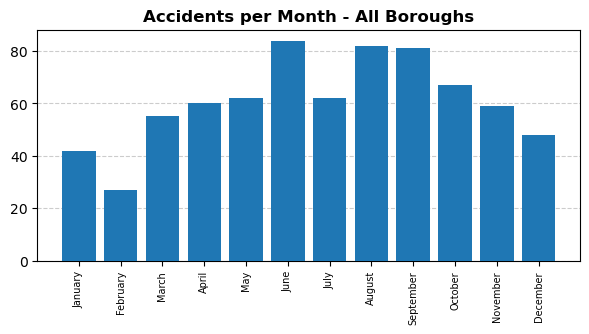

In [95]:
fig, ax = plt.subplots(figsize=(7,3))
plt.title("Accidents per Month - All Boroughs", size=12, weight="bold")
ax.grid(ls="--", color="k", alpha=0.2, axis="y", zorder = 0)
ax.bar(month_number_list, accidents_per_month, zorder = 3)
ax.set_xticks(month_number_list, month_list, rotation = 90, size=7)
plt.show()

### Accidents per borough and month

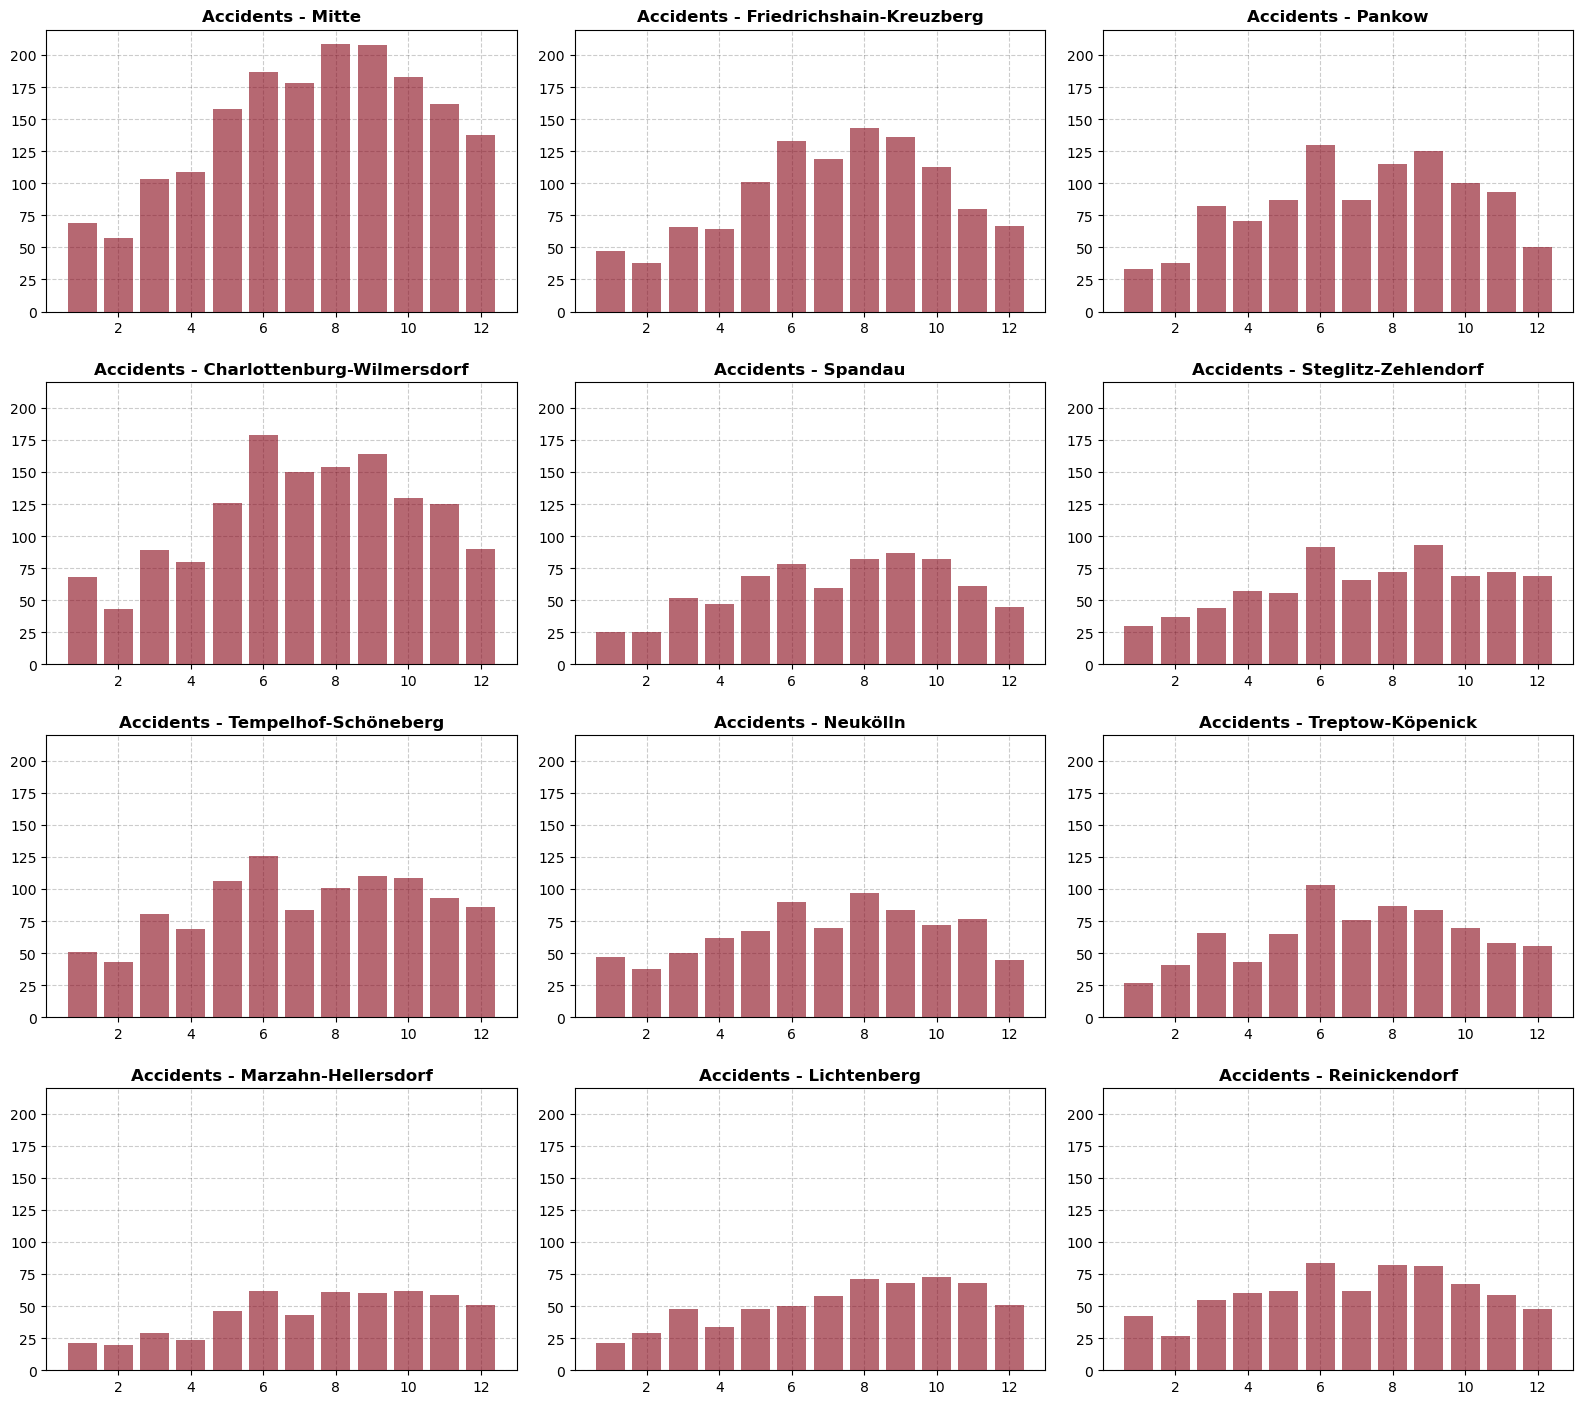

In [93]:
rows = 4
cols = 3
plot_coords = [(row,col) for row in range(rows) for col in range(cols)]

fig, ax = plt.subplots(rows, cols,figsize = (16,14))
fig.tight_layout(h_pad = 3)

for p in range(rows*cols):
    # Customer Lifetime Value
    
    df_borough = data21[data21["bez"]==p+1]
    accidents_per_month = [len(df_borough[df_borough["umonat"]==monat]) for monat in month_number_list]
    
    ax[plot_coords[p]].set_title(f"Accidents - {borough_list[p]}", size=12, weight="bold")
    ax[plot_coords[p]].grid(color="k", alpha=0.2, ls="--")
    ax[plot_coords[p]].bar(month_number_list, accidents_per_month, zorder=3, color="#860315", alpha=0.6)
    ax[plot_coords[p]].set_ylim([0,220])

plt.show()

## Location Data

In [206]:
len(data18.columns), len(data19.columns), len(data20.columns), len(data21.columns)

(25, 24, 24, 23)